# **Importing Libraries:**

In [23]:
import pandas as pd
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder


# **Reading Data:**

In [2]:
df = pd.read_csv("part2data.csv")
df

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum
5,SHIB,2.479944e+08,5606251419,"589,589,040,239,380",PoS,Ethereum
6,LTC,5.913019e+08,5729295460,"84,000,000",PoW,Litecoin
7,TRX,2.719028e+08,6018922345,"88,996,805,683",PoS,Tron
8,DOT,2.035592e+08,6659549868,"1,364,182,225",PoW,Polkadot
9,MATIC,4.232990e+08,8053184610,"10,000,000,000",PoS,Polygon


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       20 non-null     object 
 1   Volume       20 non-null     float64
 2   MarketCap    20 non-null     int64  
 3   TotalSupply  20 non-null     int64  
 4   ProofType    20 non-null     object 
 5   Network      20 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ KB


**Convert numbers to whole numbers without commas**
</n> *for Totalsupply column*

In [3]:
df["TotalSupply"] = df["TotalSupply"].str.replace(',', '', regex=True).str.split('.').str[0].astype(int)

In [5]:
df

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,985239504,PoS,Ethereum
1,UNI,9.918768e+07,3992451215,1000000000,PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,163106,PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,431804080,PoS,Avalanche
4,DAI,2.177113e+08,5513660644,5347888596,stablecoin,Ethereum
5,SHIB,2.479944e+08,5606251419,589589040239380,PoS,Ethereum
6,LTC,5.913019e+08,5729295460,84000000,PoW,Litecoin
7,TRX,2.719028e+08,6018922345,88996805683,PoS,Tron
8,DOT,2.035592e+08,6659549868,1364182225,PoW,Polkadot
9,MATIC,4.232990e+08,8053184610,10000000000,PoS,Polygon


*PART 1*
# **Using Hierarchical Clustering:**
 *Z = linkage(X, method='ward')*

<Figure size 640x480 with 0 Axes>

<Figure size 1700x1000 with 0 Axes>

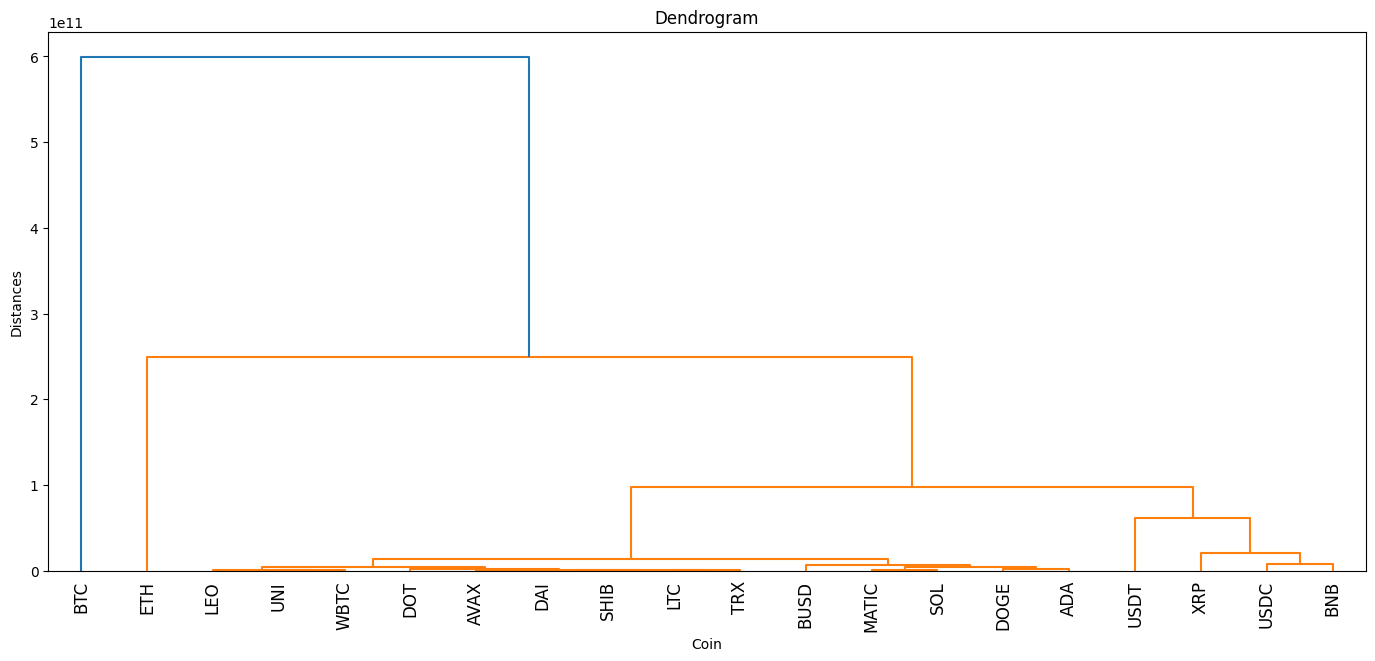

In [22]:
X = df[["MarketCap", "Volume"]].values
Z = linkage(X, method='ward')
plt.figure(figsize=(17, 7))
dendrogram(Z, labels=df["Symbol"].tolist(), leaf_rotation=90)
plt.xlabel("Coin")
plt.ylabel("Distances")
plt.title("Dendrogram")
plt.show()


**تحلیل:**

در دندوگرام بالا، ما می‌توانیم دو خوشه‌ی اصلی را مشاهده کنیم. یکی از خوشه‌ها خوشه‌ای از رمزارزهایی با MarketCap و Volume کمتر است، و دیگری خوشه‌ای از رمزارزهایی با MarketCap و Volume بیشتر.(مثل بیت‌کوین) این تقسیم‌بندی نشان می‌دهد که رمزارزها به دو دسته اصلی از نظر ارزش بازار و حجم معاملات تقسیم می‌شوند.

*PART 2*
# **ProofType:**

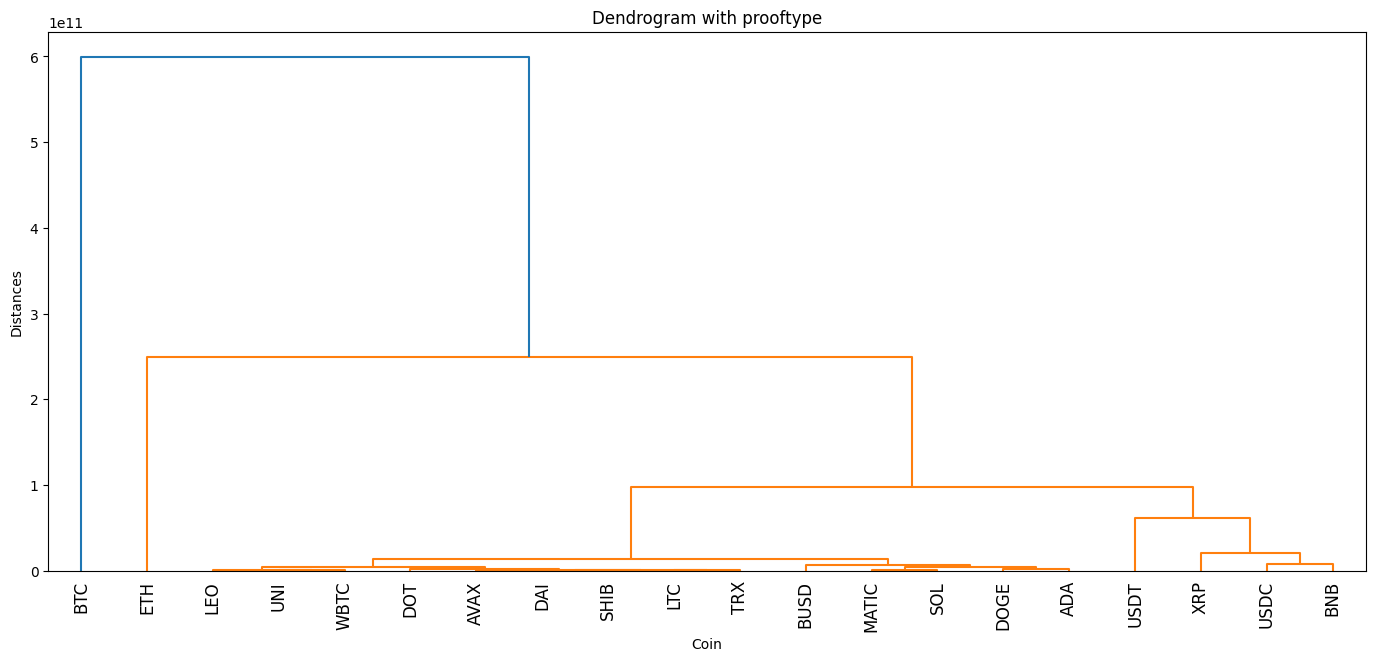

In [25]:
label_encoder = LabelEncoder()
df["ProofType"] = label_encoder.fit_transform(df["ProofType"])

X = df[["MarketCap", "Volume", "ProofType"]].values
Z = linkage(X, method='ward')
plt.figure(figsize=(17, 7))
dendrogram(Z, labels=df["Symbol"].tolist(), leaf_rotation=90)
plt.xlabel("Coin")
plt.ylabel("Distances")
plt.title("Dendrogram with prooftype")
plt.show()


**تحلیل:**

حتی با اضافه کردن ویژگی جدید prooftype، در نهایت نمودار دندوگرام مثل بخش قبلی نشان داده می‌شود

*PART 3*
# **Network:**

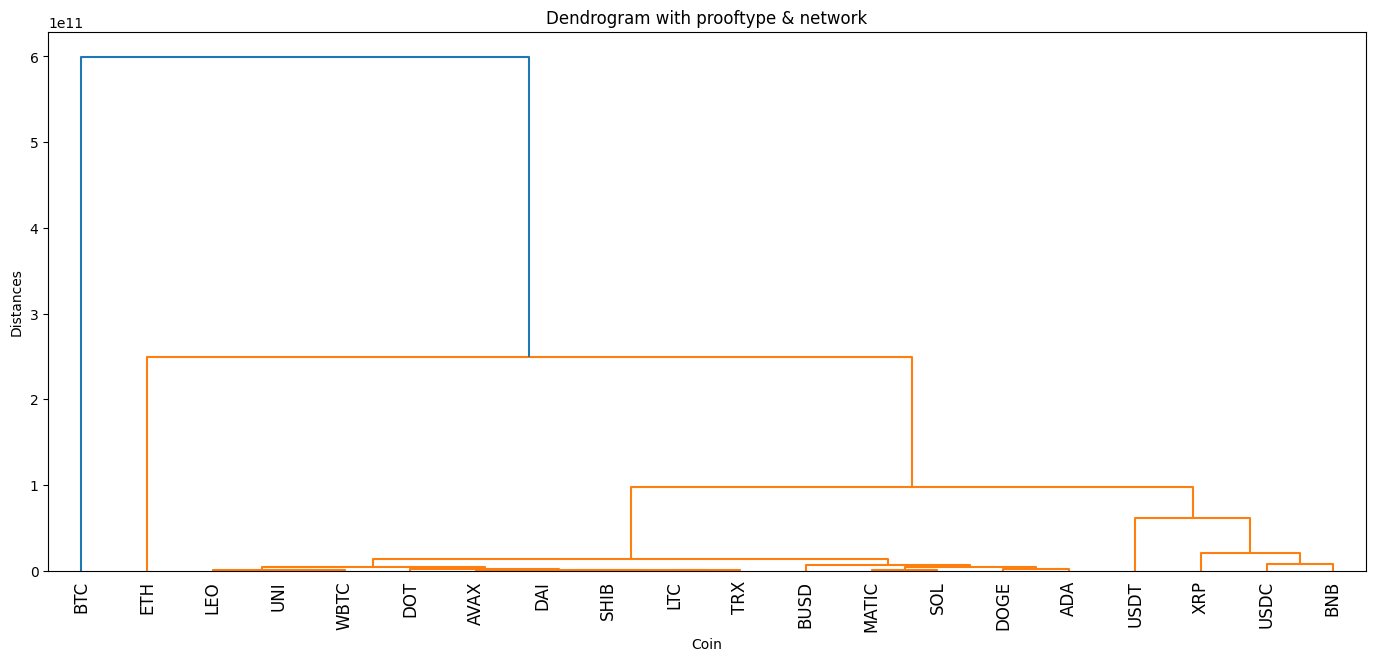

In [27]:
df["Network"] = label_encoder.fit_transform(df["Network"])

X = df[["MarketCap", "Volume", "ProofType", "Network"]].values
Z = linkage(X, method='ward')
plt.figure(figsize=(17, 7))
dendrogram(Z, labels=df["Symbol"].tolist(), leaf_rotation=90)
plt.xlabel("Coin")
plt.ylabel("Distances")
plt.title("Dendrogram with prooftype & network")
plt.show()
